In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
sales = pd.read_csv('shopping_trends_updated.csv')
sales.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
#checking dataset shape
sales.shape

(3900, 18)

cleaning data type


In [ ]:
#checking on the datatype
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
#checking for missing values
sales.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
#checking for duplicates
sales.duplicated().sum()

0

data visualization and exploration

In [ ]:
#summary of the data
sales.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
#print out than visualize the most popular method
sales.groupby('Payment Method')['Payment Method'].count().sort_values(ascending=False)

,Payment Method
Payment Method,
PayPal,677


<Axes: xlabel='count', ylabel='Payment Method'>

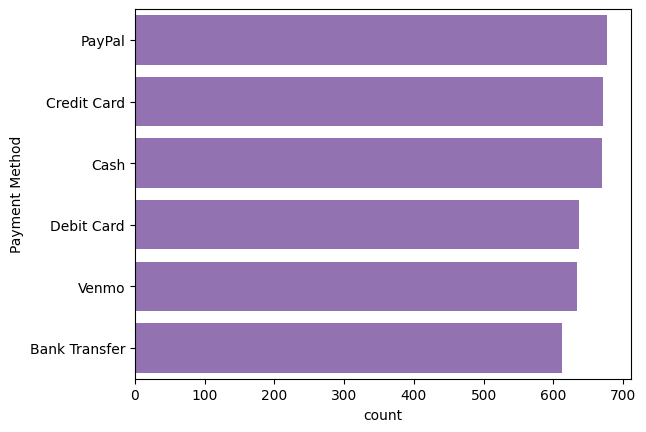

In [ ]:
#viz

base_color = sb.color_palette()[4]
method = sales['Payment Method'].value_counts().index
#method
sb.countplot(data = sales ,y = 'Payment Method' ,color =  base_color ,order = method)

In [ ]:
#print out the most purchased item by females

sales[(sales['Gender']=='Female')].groupby('Item Purchased')['Item Purchased'].count().sort_values(ascending=False).head(1)

,Item Purchased
Item Purchased,
Blouse,66


In [ ]:
#print the locations that drive majority of the sales
sales.groupby('Location')['Location'].count().sort_values(ascending=False).head(1)

,Location
Location,
Montana,96


<Axes: xlabel='count', ylabel='Location'>

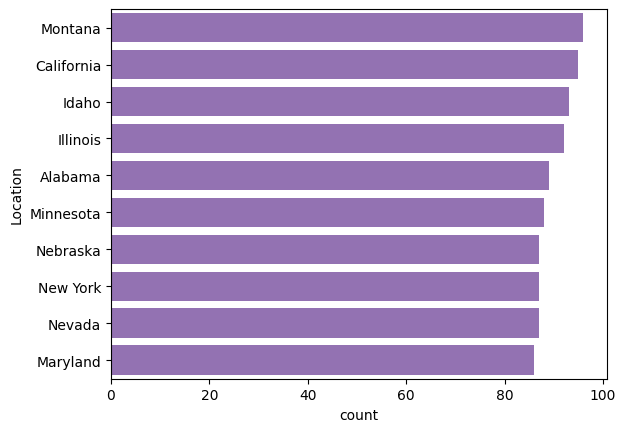

In [ ]:
#visualize the locations that drive majority of the sales
base_color = sb.color_palette()[4]
location = sales['Location'].value_counts().head(10).index
#method
sb.countplot(data = sales ,y = 'Location' ,color =  base_color ,order = location)

In [23]:
#on average how do custumors spend
mean_purchased=round(sales['Purchase Amount (USD)'].mean(),2)
median_purchased=round(sales['Purchase Amount (USD)'].median(),2)

print('Mean:'+str(mean_purchased))
print('Median:'+str(median_purchased))

Mean:59.76
Median:60.0
